## Employee Attrition Prediction using ML##

The data has been taken from IBM HR Analytics dataset from Kaggle. This is a fictional dataset created by IBM Scientists. 
In this project analysis has been performed that can discover if any particular factors or patterns that lead to attrition. If so employers can take certain precaution to prevent attrition. Employee attrition is a loss to a company, in both monetary and non-monetary.

In this project Random Forest Algorithm is used to predict and identify the main factors related to employees attrition.The obtained model for the prediction of employees’ attrition is tested on a dataset.






In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
import numpy as np


**Importing the data**

In [3]:
data_cap = pd.read_csv("C:/Users/Idea pad/Desktop/PROJECT_ML/HR_Employee_Attrition_Data.csv")


In [4]:
data_cap.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,2,80,2,17,3,2,7,7,7,7


In [12]:
# checking the shape of the data
data_cap.shape

(2940, 35)

In [33]:
# checking for datatypes
data_cap.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

**There are 25 Numerical Variables and  9 Categorical Variables**

## Exploratory Data Analysis ##

In [14]:
#check if there are any null values
data_cap.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**We can se that there are no null values in the data set**

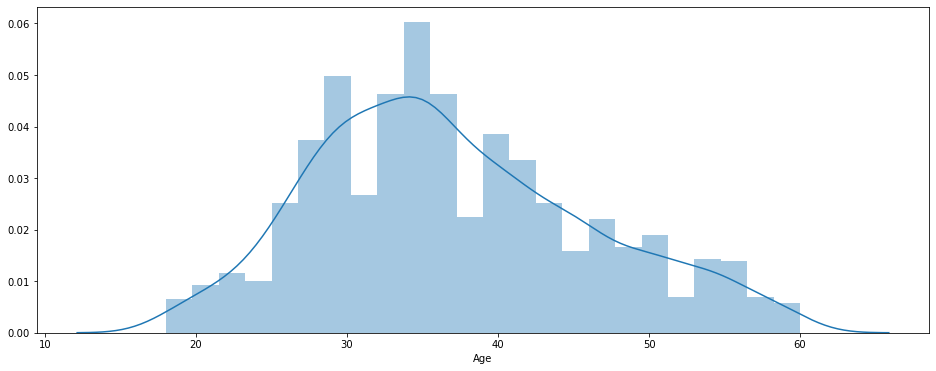

In [15]:
#plot the Age distribution
plt.figure(figsize = (16,6))
sns.distplot(data_cap['Age'])
plt.show()

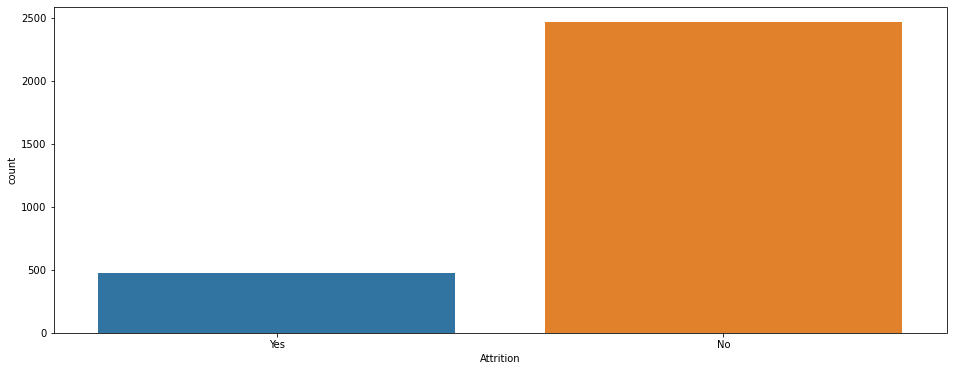

In [16]:
# Plot count of Attrition
plt.figure(figsize = (16,6))
sns.countplot('Attrition', data = data_cap)
plt.show()

In [17]:
#Calculate the attrition percentage
print("Attrition % in the org is::",(data_cap['Attrition'].value_counts()['Yes']/data_cap['Attrition'].count())*100)

Attrition % in the org is:: 16.122448979591837


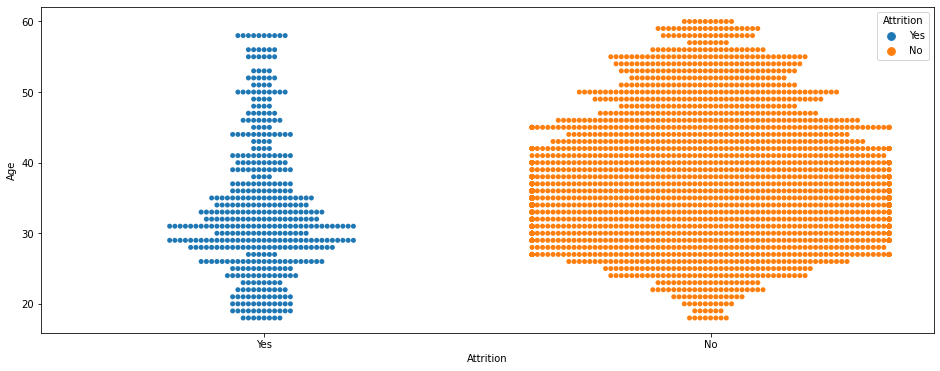

In [19]:
#Check to see if there is any relation b/w Age and Attrition
plt.figure(figsize = (16,6))
sns.swarmplot(y = 'Age', x = 'Attrition', data = data_cap, hue = 'Attrition')
plt.show()


**Insight 1:**

**From the above plot we can see that there is NO linear relation between 'Age' and 'Attrition', 
but bulk of the attrition is happening between the age groups of '25-32'**

Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64


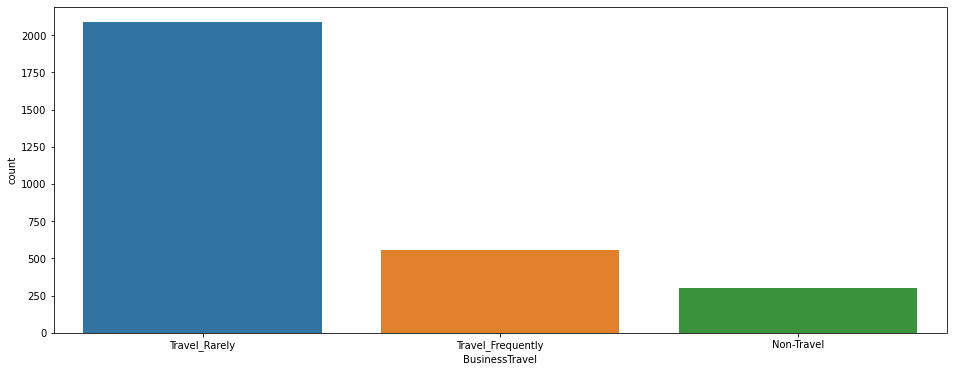

In [22]:
# Plotting the count by business travel
plt.figure(figsize = (16,6))
print(data_cap['BusinessTravel'].value_counts())
sns.countplot(x= 'BusinessTravel', data = data_cap)
plt.show()

In [ ]:
#creating a new variable 'cat_BusinessTravel' . Converting into a categorical variable
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3

In [21]:
data_cap.loc[data_cap['BusinessTravel'] == 'Travel_Rarely','cat_BusinessTravel'] = 1
data_cap.loc[data_cap['BusinessTravel'] == 'Travel_Frequently','cat_BusinessTravel'] = 2
data_cap.loc[data_cap['BusinessTravel'] == 'Non-Travel','cat_BusinessTravel'] = 3
data_cap.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,80,0,7,3,3,0,0,0,0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,80,0,8,3,3,8,7,3,0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,80,1,6,3,3,2,2,2,2,1.0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,80,0,8,2,2,7,7,3,6,2.0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,80,3,12,3,2,1,0,0,0,1.0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,80,1,1,2,3,1,0,0,0,1.0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,9,...,80,0,10,2,3,9,7,1,8,2.0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,80,2,17,3,2,7,7,7,7,1.0


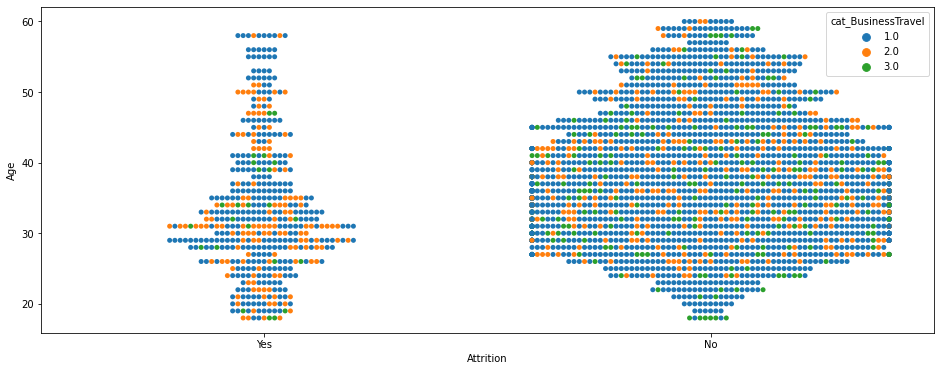

In [23]:
#Plotting Attrition for Age and business travel
#Travel_Rarely = 1
#Travel_Frequently = 2
#Non_Travel = 3
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y='Age',  data = data_cap, hue = 'cat_BusinessTravel')
plt.show()


**Insight 2:**

**From the Above plot we can see that attrition is higher for employees in age bracket of [25-32].
Also, in this age group employees are travelling more.**

Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64


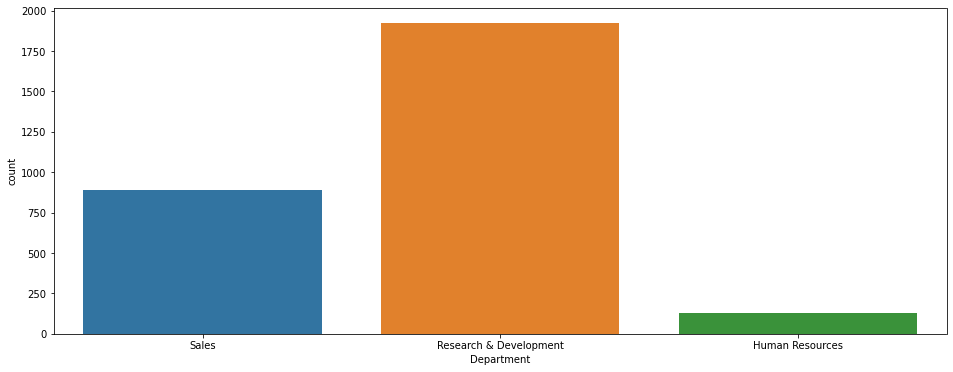

In [24]:
#Plotting counts for department
print(data_cap['Department'].value_counts())
plt.figure(figsize = (16,6))
sns.countplot(data_cap['Department'])
plt.show()

In [25]:
#converting 'Department' data to ordinal variable
#Sales = 1
#Research and Development = 2
#Human Resorces = 3
data_cap.loc[data_cap['Department'] == 'Sales', 'ord_Department'] = 1
data_cap.loc[data_cap['Department'] == 'Research & Development', 'ord_Department'] = 2
data_cap.loc[data_cap['Department'] == 'Human Resources', 'ord_Department'] = 3


In [26]:
#Getting the count of Business travel based on Department
#HR
departmentgrp = data_cap.groupby(by = 'Department')

df1 = departmentgrp.get_group('Human Resources')['BusinessTravel'].value_counts()
df1 = pd.DataFrame(df1)
df1 = df1.reset_index()
df1['Department'] = 'HR'
df1

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR


In [31]:
#R&D
df2 = departmentgrp.get_group('Research & Development')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'R&D'
df3 = df1.append(df2, ignore_index=True)
df3


,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D


In [28]:
df2 = departmentgrp.get_group('Sales')['BusinessTravel'].value_counts()
df2 = df2.to_frame().reset_index()
df2['Department'] = 'Sales'
df4 = df3.append(df2, ignore_index=True)
df4

,index,BusinessTravel,Department
0,Travel_Rarely,92,HR
1,Travel_Frequently,22,HR
2,Non-Travel,12,HR
3,Travel_Rarely,1364,R&D
4,Travel_Frequently,364,R&D
5,Non-Travel,194,R&D
6,Travel_Rarely,630,Sales
7,Travel_Frequently,168,Sales
8,Non-Travel,94,Sales


In [33]:
#Calculating % of frequent travel employees in Sales and R&D
print("% of frequent travel in Sales is::",(df4.loc[((df4['Department'] == 'Sales') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'Sales', 'BusinessTravel'].sum()))
print("% of frequent travel in R&D is ::",(df4.loc[((df4['Department'] == 'R&D') & (df4['index'] == 'Travel_Frequently')),'BusinessTravel'].sum())/(df4.loc[df4['Department'] == 'R&D', 'BusinessTravel'].sum()))

% of frequent travel in Sales is:: 0.18834080717488788
% of frequent travel in R&D is :: 0.18938605619146723


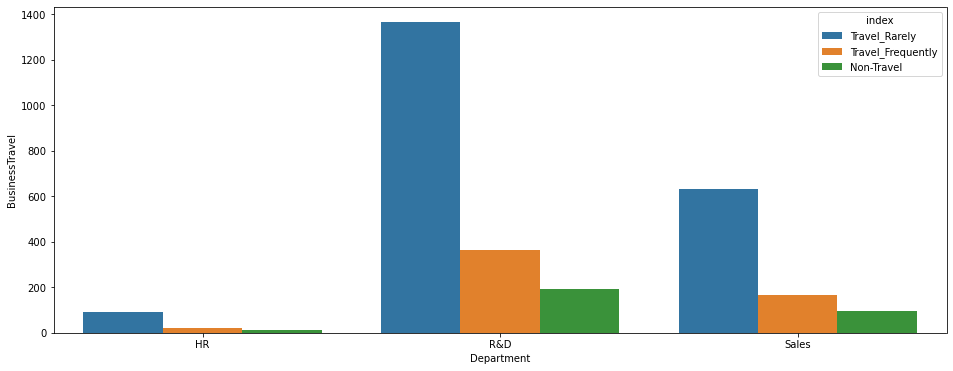

In [34]:
#plotting department data against travel
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'BusinessTravel' , data = df4, hue = 'index')
plt.show()

In [37]:
##Calculating attrition % for each department
#Sales
attrbysales = departmentgrp.get_group('Sales')['Attrition'].value_counts()
#HR
attrbyHR = departmentgrp.get_group('Human Resources')['Attrition'].value_counts()
#RnD
attrbyRnD = departmentgrp.get_group('Research & Development')['Attrition'].value_counts()
attrbydept = pd.DataFrame(columns = ['Department', 'Attrition'])
#attrbydept.reset_index(inplace = True)
attrbydept.loc[len(attrbydept)] = ["Sales", attrbysales['Yes']/(attrbysales.sum())*100]
attrbydept.loc[len(attrbydept)] = ["HR",(attrbyHR['Yes']/attrbyHR.sum())*100]
attrbydept.loc[len(attrbydept)] = ["R&D",(attrbyRnD['Yes']/attrbyRnD.sum())*100]
attrbydept



,Department,Attrition
0,Sales,20.627803
1,HR,19.047619
2,R&D,13.839750


**Insight 3:**

**The rate of attrition has been displayed across departments and job roles. As we can see, Sales team was most impacted by attrition closely followed by a HR team**

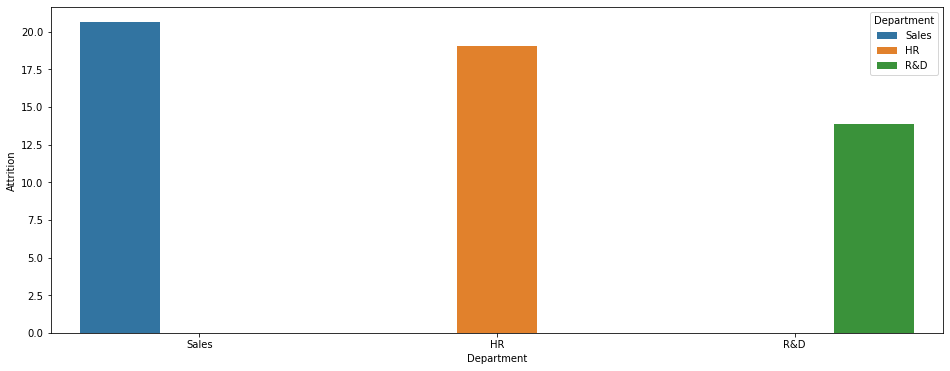

In [38]:
#Plotting Attrition% for each department
plt.figure(figsize = (16,6))
sns.barplot(x= 'Department', y = 'Attrition' , data = attrbydept, hue = 'Department')
plt.show()

In [39]:
##Calculating attrition vs EnvironmentSatisfaction level
envsatisfcationgrp = data_cap.groupby(['EnvironmentSatisfaction','Attrition'])
envsatisfcationgrp.groups.keys()


dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [40]:
count = envsatisfcationgrp.get_group((1, 'Yes'))['EnvironmentSatisfaction'].count()
count
AttrperEnvSat = pd.DataFrame(columns = ['EnvironmentSatisfaction', 'Attrition', 'Count'])
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['1', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144


In [41]:
count = envsatisfcationgrp.get_group((2, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['2', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86


In [42]:
count = envsatisfcationgrp.get_group((3, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['3', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124


In [43]:
count = envsatisfcationgrp.get_group((4, 'Yes'))['EnvironmentSatisfaction'].count()
AttrperEnvSat.loc[len(AttrperEnvSat)] = ['4', 'Yes', count]
AttrperEnvSat

,EnvironmentSatisfaction,Attrition,Count
0,1,Yes,144
1,2,Yes,86
2,3,Yes,124
3,4,Yes,120


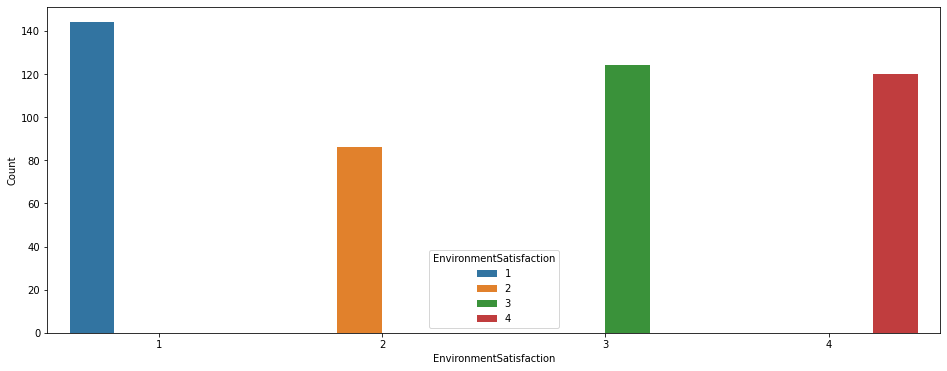

In [44]:
#Plotting Attrition vs Environmentsatisfaction
plt.figure(figsize = (16,6))
sns.barplot(x= 'EnvironmentSatisfaction', y = 'Count' , data = AttrperEnvSat, hue = 'EnvironmentSatisfaction')
plt.show()



**Insight 4:**

**Attrition is highest for group that has EnvironmentSatisfaction of '1', but for level '3' and '4' its high as well.**

In [45]:
#Attrition by gender
AttrGender = data_cap.groupby(['Attrition', 'Gender'])
AttrGender.groups.keys()

dict_keys([('No', 'Female'), ('No', 'Male'), ('Yes', 'Female'), ('Yes', 'Male')])

In [46]:
AttrperGend = pd.DataFrame(columns = ['Gender', 'Attrition', 'Count'])
AttrperGend

,Gender,Attrition,Count


In [47]:
count = AttrGender.get_group(('Yes', 'Female'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Female', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174


In [49]:
count = AttrGender.get_group(('Yes', 'Male'))['Attrition'].count()
AttrperGend.loc[len(AttrperGend)] = ['Male', 'Yes', count]
AttrperGend

,Gender,Attrition,Count
0,Female,Yes,174
1,Male,Yes,300


In [50]:
data_cap['Gender'].value_counts()
#plt.figure(figsize = (16,6))
#sns.barplot(x= 'Gender', y = 'Count' , data = AttrperGend, hue = 'Gender')

Male      1764
Female    1176
Name: Gender, dtype: int64

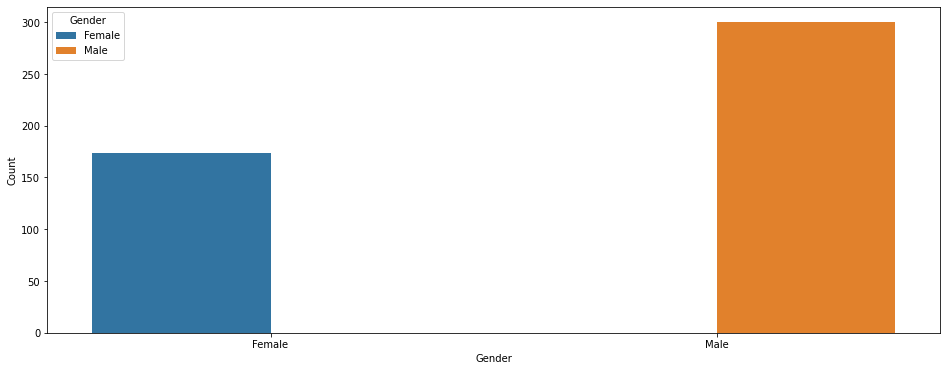

In [51]:
#Plotting Attrition vs Gender
plt.figure(figsize = (16,6))
sns.barplot(x= 'Gender', y = 'Count' , data = AttrperGend, hue = 'Gender')
plt.show()


In [52]:
#Attrition by job level
attrbyJoblvl = data_cap.groupby(['JobLevel', 'Attrition'])
attrbyJoblvl.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes'), (5, 'No'), (5, 'Yes')])

In [75]:
count = attrbyJoblvl.get_group((1, 'Yes'))['Attrition'].count() 
count

286

In [76]:
attrvsJoblvl = pd.DataFrame(columns = ['JobLevel', 'Attrition', 'count', 'Attr%'])
attrvsJoblvl

,JobLevel,Attrition,count,Attr%


In [77]:
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['1', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[1])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175


In [78]:
count = attrbyJoblvl.get_group((2, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['2', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[2])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828


In [79]:
count = attrbyJoblvl.get_group((3, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['3', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[3])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899


In [80]:
count = attrbyJoblvl.get_group((4, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['4', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[4])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981


In [81]:
count = attrbyJoblvl.get_group((5, 'Yes'))['Attrition'].count() 
attrvsJoblvl.loc[len(attrvsJoblvl)] = ['5', 'Yes', count, (count/data_cap['JobLevel'].value_counts()[5])*100]
attrvsJoblvl

,JobLevel,Attrition,count,Attr%
0,1,Yes,286,26.335175
1,2,Yes,104,9.737828
2,3,Yes,64,14.678899
3,4,Yes,10,4.716981
4,5,Yes,10,7.246377


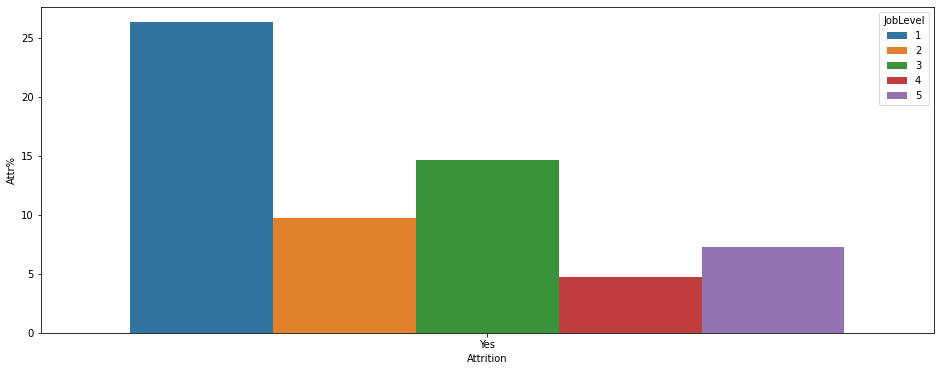

In [82]:
#Plotting Attrition vs Job Level
plt.figure(figsize = (16,6))
sns.barplot(x= 'Attrition', y = 'Attr%' , data = attrvsJoblvl, hue = 'JobLevel')
plt.show()



**Insight 5:**

**As we can see attrition rate is highest in Job level 1, followed by job level 3**

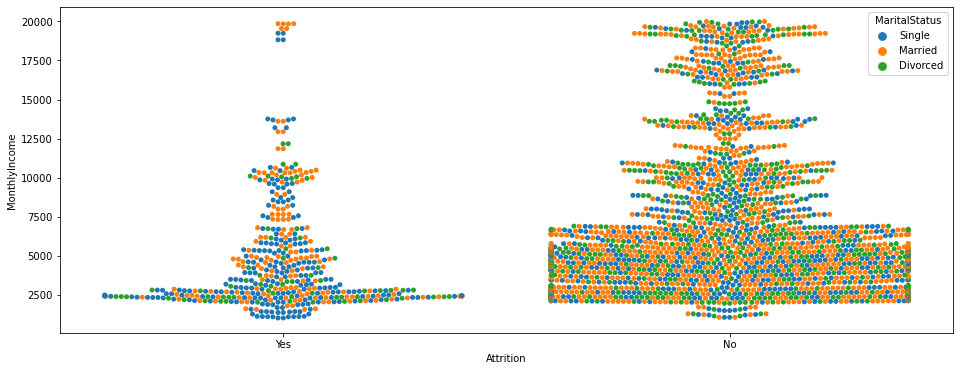

In [83]:
#Plotting Attrition vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'Attrition', y = 'MonthlyIncome' , data = data_cap, hue= 'MaritalStatus')
plt.show()



**Insight 6:**

**Attrition is highest amount employees who are earning between (2500-5000)**

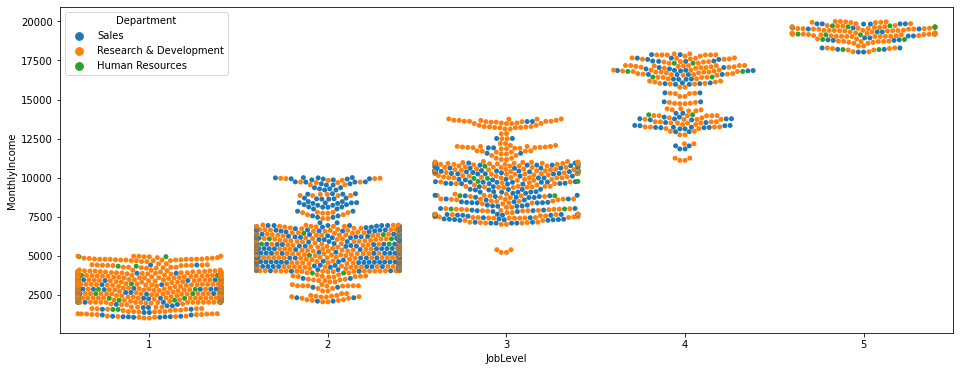

In [85]:
#Plotting Joblevel vs monthly income
plt.figure(figsize = (16,6))
sns.swarmplot(x= 'JobLevel', y = 'MonthlyIncome' , data = data_cap, hue= 'Department')
plt.show()

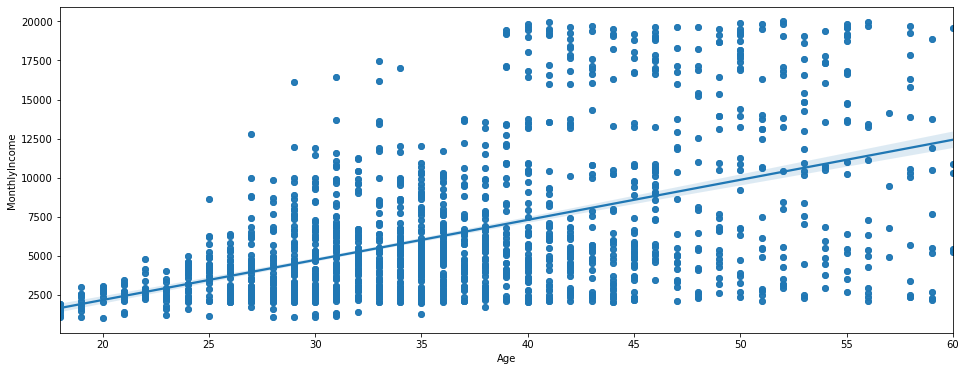

In [86]:
#Plotting Age vs monthly income
plt.figure(figsize = (16,6))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data = data_cap)
plt.show()



**Insight 7:**

**In the above regression plot we can see that there is a linear relation between Age and Monthly income.**

In [87]:
data_cap.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cat_BusinessTravel,ord_Department
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1.0,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,2.0,2.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,0,7,3,3,0,0,0,0,1.0,2.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,0,8,3,3,8,7,3,0,2.0,2.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,1,6,3,3,2,2,2,2,1.0,2.0


In [88]:
#Analyzing salary hike
data_cap['PercentSalaryHike'].describe()

count    2940.000000
mean       15.209524
std         3.659315
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

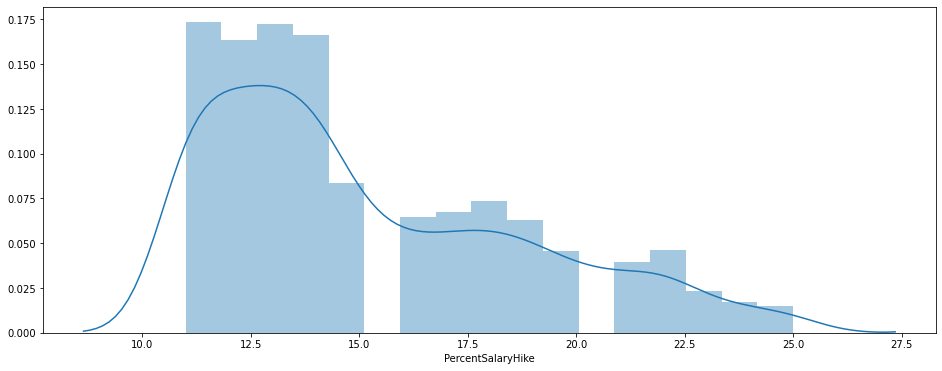

In [89]:
#Plotting histogram of Hike%
plt.figure(figsize = (16,6))
sns.distplot(data_cap['PercentSalaryHike'], kde = True)
plt.show()



**The salary hike histogram is skewed to the right**

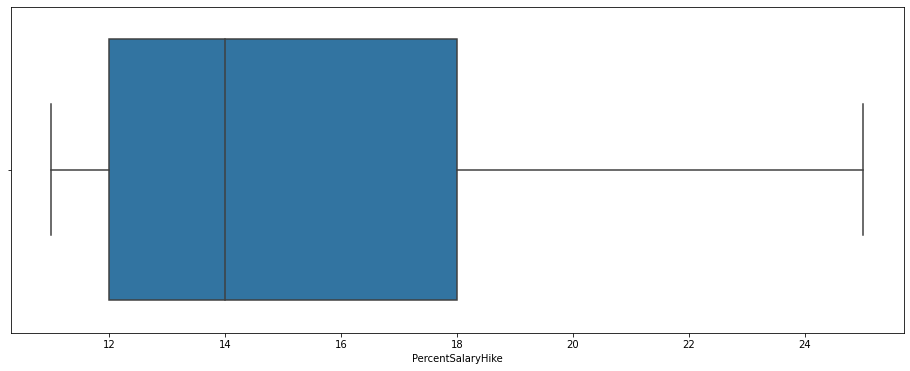

In [90]:
#Plotting box plot for salary hike
plt.figure(figsize = (16,6))
sns.boxplot('PercentSalaryHike', data = data_cap)
plt.show()



**Inisght 8:**

**The median salary hike is 14% and the mean is 15%. The highest salary hike given is 25%** 

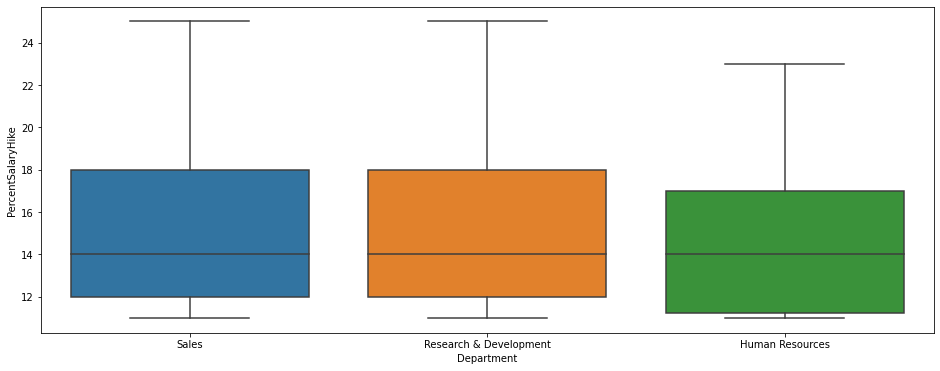

In [91]:
#Plotting hike% for each department
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'Department', data = data_cap)
plt.show()

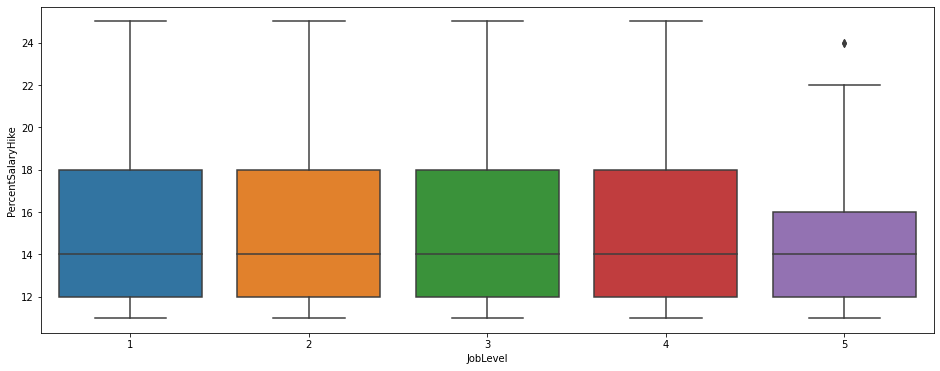

In [92]:
#Plotting hike% for each job level
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobLevel', data = data_cap)
plt.show()

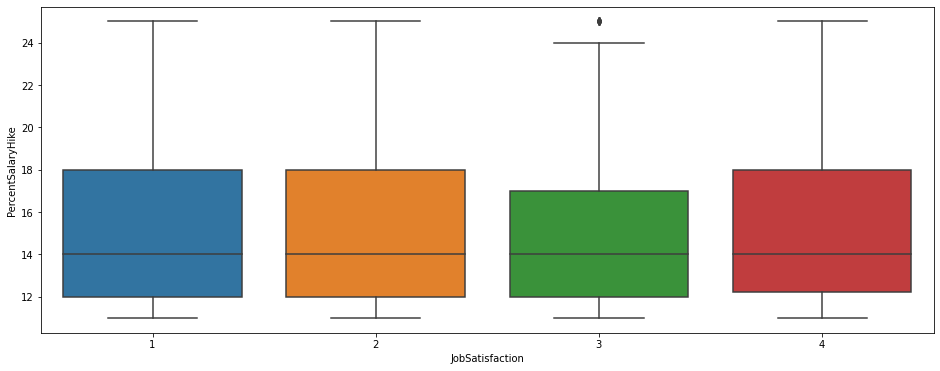

In [93]:
#Plotting hike% for each job satisfaction level
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'JobSatisfaction', data = data_cap)
plt.show()

In [94]:
grp2 = data_cap.groupby(['JobSatisfaction', 'Attrition'])
grp2.groups.keys()

dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [95]:
count = grp2.get_group((1, 'Yes'))['Attrition'].count()
count

132

In [96]:
attrbyJobsat = pd.DataFrame(columns = ['Jobsat','Attrition','Count', 'Attr%'])
attrbyJobsat.loc[len(attrbyJobsat)] = ['1', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[1]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.83737


In [97]:
count = grp2.get_group((2, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['2', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[2]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571


In [98]:
count = grp2.get_group((3, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['3', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[3]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837


In [99]:
count = grp2.get_group((4, 'Yes'))['Attrition'].count()
attrbyJobsat.loc[len(attrbyJobsat)] = ['4', 'Yes', count, count/data_cap['JobSatisfaction'].value_counts()[4]*100]
attrbyJobsat

,Jobsat,Attrition,Count,Attr%
0,1,Yes,132,22.837370
1,2,Yes,92,16.428571
2,3,Yes,146,16.515837
3,4,Yes,104,11.328976


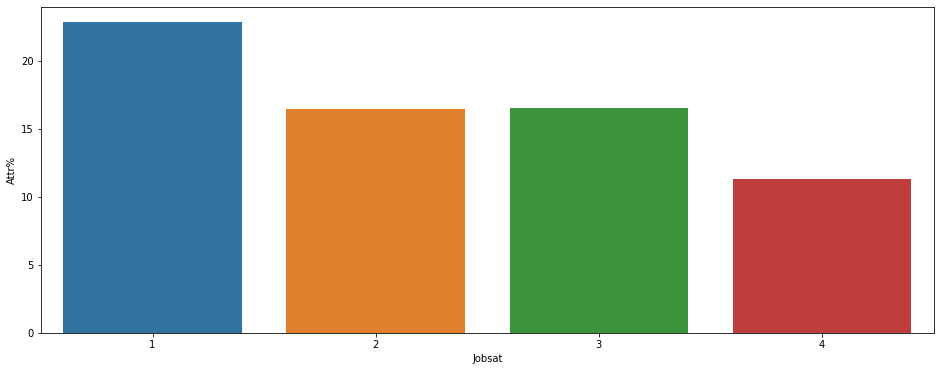

In [101]:
#Plotting Attr% for Job satisfaction level
plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Jobsat', data = attrbyJobsat)
plt.show()



**Insight 9:**

**Employees with job satisfaction level of 1 have the highest attrition % of 22.8%**

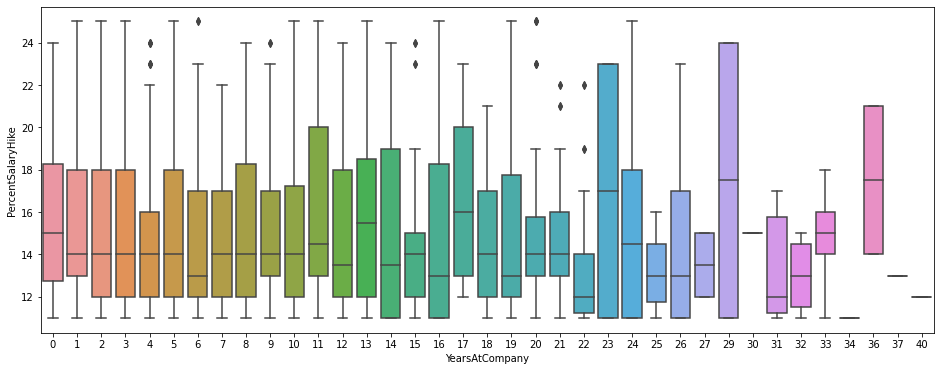

In [102]:
#Plotting hike% for No of years worked
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'YearsAtCompany', data = data_cap)
plt.show()

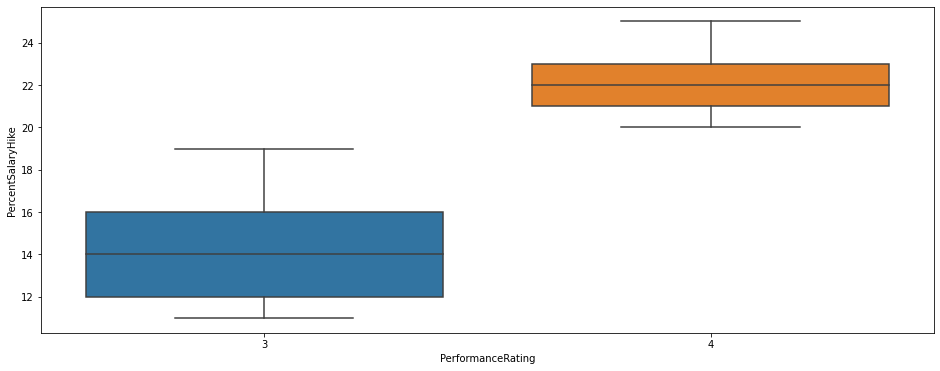

In [103]:
#Plotting 'Performance rating' and 'hike%'
plt.figure(figsize = (16,6))
sns.boxplot(y = 'PercentSalaryHike', x = 'PerformanceRating', data = data_cap)
plt.show()



**Insight 10:**

**Employees with rating of 4 have got hikes between (20-25), whereas employees with rating of 3 have got between (11-19)**

In [104]:
grp1 = data_cap.groupby(['RelationshipSatisfaction', 'Attrition'])
grp1.groups.keys()


dict_keys([(1, 'No'), (1, 'Yes'), (2, 'No'), (2, 'Yes'), (3, 'No'), (3, 'Yes'), (4, 'No'), (4, 'Yes')])

In [105]:
count = grp1.get_group((1, 'Yes'))['Attrition'].count()
count

114

In [106]:
attrbyrelsat = pd.DataFrame(columns = ['Relsat', 'Attrition', 'Count', 'Attr%'])
attrbyrelsat

,Relsat,Attrition,Count,Attr%


In [107]:
attrbyrelsat.loc[len(attrbyrelsat)] = ['1', 'Yes', count, count/data_cap['RelationshipSatisfaction'].value_counts()[1]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174


In [108]:
count = grp1.get_group((2, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['2', 'Yes', count,count/data_cap['RelationshipSatisfaction'].value_counts()[2]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485


In [109]:
count = grp1.get_group((3, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['3', 'Yes', count, count/data_cap['RelationshipSatisfaction'].value_counts()[3]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410


In [110]:
count = grp1.get_group((4, 'Yes'))['Attrition'].count()
attrbyrelsat.loc[len(attrbyrelsat)] = ['4', 'Yes', count, count/data_cap['RelationshipSatisfaction'].value_counts()[4]*100]
attrbyrelsat

,Relsat,Attrition,Count,Attr%
0,1,Yes,114,20.652174
1,2,Yes,90,14.851485
2,3,Yes,142,15.468410
3,4,Yes,128,14.814815


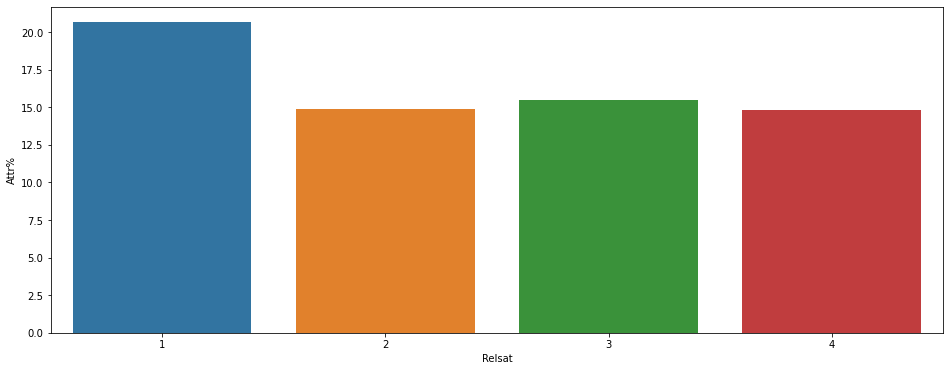

In [111]:
plt.figure(figsize = (16,6))
sns.barplot(y = 'Attr%', x = 'Relsat', data = attrbyrelsat)
plt.show()



**Insight 11:**

**Employees with relation satisfaction of 1 have highest attrition numbers at 20.65%.**

## Data Prepeocessing ##

In [5]:
#Checking for unwanted columns
print("EmployeeCount unique values::", data_cap['EmployeeCount'].unique())
print("Over18 unique values::",data_cap['Over18'].unique())
print("StandardHours unique values::",data_cap['StandardHours'].unique())
#There is only one value for above column hence dropping it as they will not affect our model

EmployeeCount unique values:: [1]
Over18 unique values:: ['Y']
StandardHours unique values:: [80]


In [6]:
data_cap.drop(columns = ['EmployeeCount', 'Over18','StandardHours', 'EmployeeNumber'], inplace = True)

In [7]:
data_cap.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
data_cap.shape

(2940, 31)

## Converting Lables to nominal data ##

*Converting  'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole'
'MaritalStatus', 'overtime'*


In [12]:
def labelencoder(df):
    temp_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    temp_df["Attrition"] = le.fit_transform(temp_df["Attrition"])
    temp_df["BusinessTravel"] = le.fit_transform(temp_df["BusinessTravel"])
    temp_df["Department"] = le.fit_transform(temp_df["Department"])
    temp_df["EducationField"] = le.fit_transform(temp_df["EducationField"])
    temp_df["Gender"] = le.fit_transform(temp_df["Gender"])
    temp_df["JobRole"] = le.fit_transform(temp_df["JobRole"])
    temp_df["MaritalStatus"] = le.fit_transform(temp_df["MaritalStatus"])
    temp_df["OverTime"] = le.fit_transform(temp_df["OverTime"])
    return temp_df

encoded_cap_data = labelencoder(data_cap)


In [13]:
data_cap.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [34]:
#Segregating the Independent and the dependant variable
y = encoded_cap_data["Attrition"].values
X = encoded_cap_data.drop(["Attrition"],axis =1)

**Training and Testing of data**

In [15]:
#Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)


In [28]:
X_train.shape

(2352, 30)

**Now let’s train the Random forest classification model for the task of Employee Attrition prediction**

In [29]:
#Build the decision tree model with tree size 50
model_HR = RandomForestClassifier(n_estimators = 50, random_state = 0)
model_HR.fit(X_train, y_train)
model_HR_score_train = model_HR.score(X_train, y_train)
print("Training score: ",model_HR_score_train)
model_HR_score_test = model_HR.score(X_test, y_test)
print("Testing score: ",model_HR_score_test)


Training score:  0.9995748299319728
Testing score:  0.9778911564625851


In [18]:
#caluclating the probabilities for the AUC curve
#Decision treemodel_dt_2
y_pred_prob = model_HR.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.02, 0.  , 0.04, 0.2 , 0.64, 0.04, 0.78, 0.  , 0.06, 0.  , 0.86,
       0.08, 0.06, 0.1 , 0.06, 0.04, 0.1 , 0.06, 0.1 , 0.08, 0.04, 0.12,
       0.02, 0.12, 0.72, 0.02, 0.04, 0.12, 0.08, 0.02, 0.08, 0.12, 0.  ,
       0.1 , 0.1 , 0.04, 0.1 , 0.02, 0.12, 0.22, 0.26, 0.66, 0.06, 0.  ,
       0.66, 0.02, 0.04, 0.72, 0.  , 0.18, 0.04, 0.  , 0.32, 0.02, 0.9 ,
       0.02, 0.1 , 0.  , 0.1 , 0.  , 0.2 , 0.2 , 0.02, 0.22, 0.02, 0.1 ,
       0.04, 0.16, 0.  , 0.06, 0.78, 0.12, 0.22, 0.02, 0.54, 0.8 , 0.04,
       0.08, 0.06, 0.12, 0.06, 0.46, 0.06, 0.62, 0.02, 0.1 , 0.06, 0.  ,
       0.8 , 0.06, 0.04, 0.04, 0.08, 0.06, 0.7 , 0.14, 0.  , 0.1 , 0.06,
       0.04, 0.04, 0.06, 0.74, 0.06, 0.12, 0.82, 0.04, 0.7 , 0.04, 0.26,
       0.1 , 0.16, 0.3 , 0.2 , 0.12, 0.06, 0.  , 0.  , 0.08, 0.18, 0.04,
       0.  , 0.  , 0.38, 0.04, 0.06, 0.02, 0.  , 0.04, 0.74, 0.04, 0.14,
       0.16, 0.08, 0.06, 0.02, 0.06, 0.04, 0.02, 0.06, 0.22, 0.02, 0.1 ,
       0.62, 0.32, 0.  , 0.72, 0.12, 0.06, 0.08, 0.

In [19]:
#Predicting the Attrition for X_test
y_pred = model_HR.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

## Peformance Metrics ##

In [30]:
# Model Accuracy:
print ("Model Accuracy is::", (model_HR.score(X_test, y_test))*100)
# Recall
print("Model recall is::", (recall_score(y_test, y_pred))*100)

Model Accuracy is:: 97.78911564625851
Model recall is:: 86.5979381443299


**As observed, our Random Forest returns around 97% accuracy for its predictions and at first glance, this may seem like a good model.**



In [21]:
#Area under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

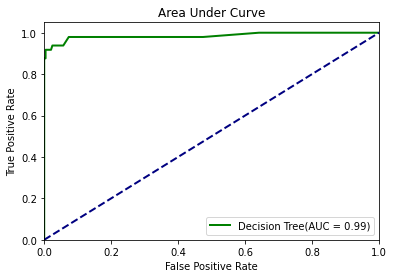

In [23]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
#Printing confusion matrix
print (confusion_matrix(y_test, y_pred))

[[491   0]
 [ 13  84]]


In [25]:
import itertools
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Stayed", "Left"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

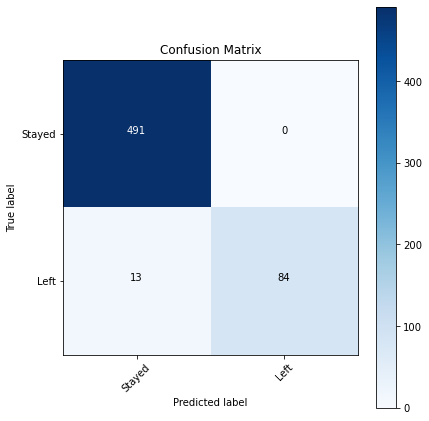

In [31]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

**Sklearn’s Random Forest classifier also contains a very handy attribute for analyzing feature importance which tells us which features in our dataset have received the most importance by the Random Forest algorithm. Let’s visualize the features taken into account by our machine learning model for employee attrition:**

Feature ranking:
1. feature 15 (0.081495)
2. feature 18 (0.063153)
3. feature 0 (0.057124)
4. feature 2 (0.055575)
5. feature 16 (0.048604)
6. feature 9 (0.047678)
7. feature 23 (0.046168)
8. feature 4 (0.046068)
9. feature 26 (0.040521)
10. feature 19 (0.040156)
11. feature 17 (0.036169)
12. feature 12 (0.030960)
13. feature 7 (0.030857)
14. feature 29 (0.030273)
15. feature 10 (0.029639)
16. feature 27 (0.029014)
17. feature 11 (0.028440)
18. feature 25 (0.028361)
19. feature 13 (0.028123)
20. feature 24 (0.024890)
21. feature 28 (0.024301)
22. feature 21 (0.024099)
23. feature 22 (0.021886)
24. feature 5 (0.021763)
25. feature 14 (0.021084)
26. feature 6 (0.018977)
27. feature 1 (0.015638)
28. feature 3 (0.012129)
29. feature 8 (0.011200)
30. feature 20 (0.005651)


Text(0.5, 0, 'index of the feature')

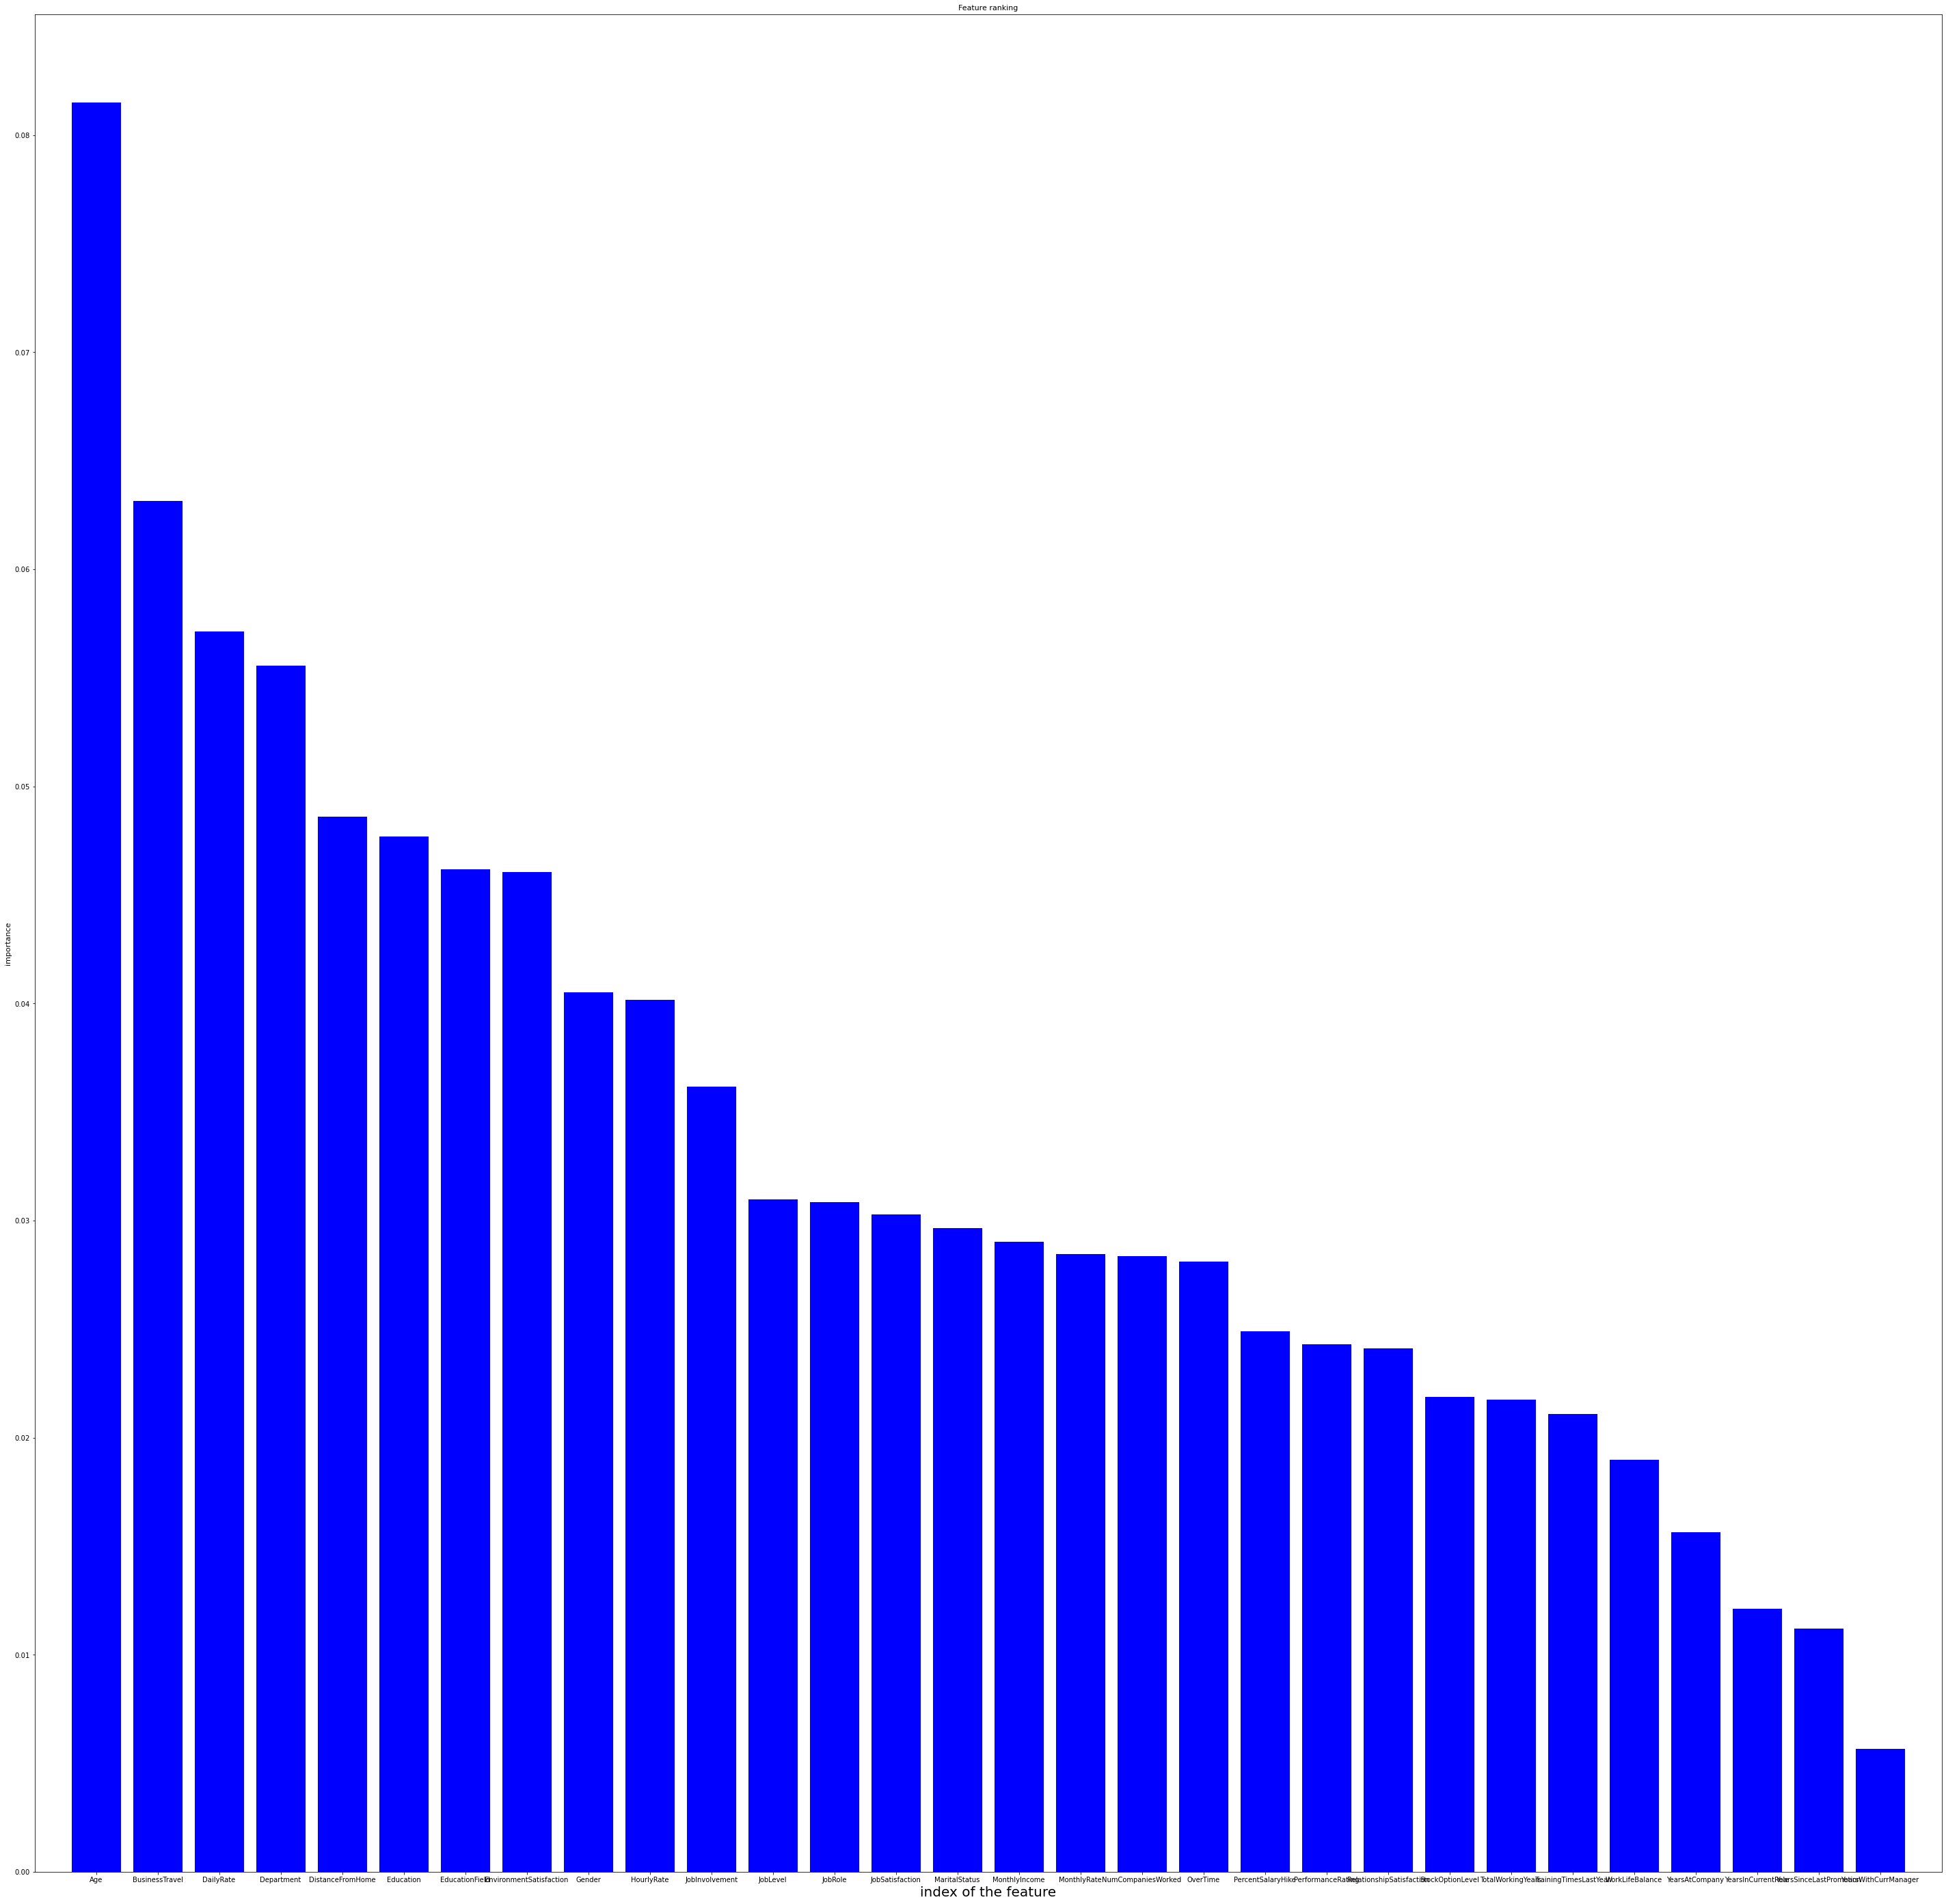

In [27]:
importances= model_HR.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
f, ax = plt.subplots(figsize=(50,50))
plt.title("Feature ranking", fontsize = 11)
plt.bar(range(X_train.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("importance", fontsize = 11)
plt.xlabel("index of the feature", fontsize = 20)